### Consider the Amazon Alexa Reviews Dataset. This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc. Perform following operations on this dataset.

1. Plot a graph of Positive and Negative Feedback (1 = Positive Feedback, 0 = Negative Feedback)
2. Convert the review text into lowercase.
3. Remove all punctuations from review text.
4. Remove emoticons and emojis from the text
5. Tokenize the review text into words.
6. Remove the Stopwords from the tokenized text.
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("Datasets/Alexa-Dataset.csv")

In [44]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [63]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

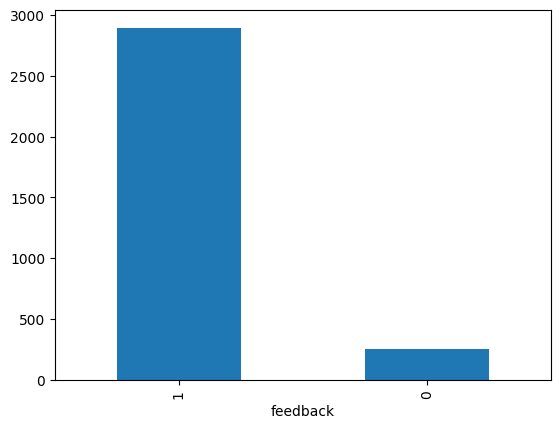

In [45]:
df["feedback"].value_counts().plot(kind="bar")
plt.title("")
plt.show()

In [46]:
#Convert the review text into lowercase.
df["verified_reviews"] = df["verified_reviews"].str.lower()
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love my echo!,1
1,5,31-Jul-18,Charcoal Fabric,loved it!,1
2,4,31-Jul-18,Walnut Finish,"sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing. my 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"i do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,only complaint i have is that the sound qualit...,1


In [47]:
# Remove all punctuations from review text

In [48]:
import string

In [52]:
punc = string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [57]:
def remove_punc(text):
    ret = ''
    for i in text:
        if i not in punc:
            ret += i
    return ret

In [60]:
remove_punc("text..112~!@")

'text112'

In [67]:
df["verified_reviews"] = df["verified_reviews"].apply(lambda x: remove_punc(str(x)))

In [68]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love my echo,1
1,5,31-Jul-18,Charcoal Fabric,loved it,1
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer ...,1
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my 4 y...,1
4,5,31-Jul-18,Charcoal Fabric,music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,perfect for kids adults and everyone in between,1
3146,5,30-Jul-18,Black Dot,listening to music searching locations checkin...,1
3147,5,30-Jul-18,Black Dot,i do love these things i have them running my ...,1
3148,5,30-Jul-18,White Dot,only complaint i have is that the sound qualit...,1


In [69]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [70]:
# Remove emoticons and emojis from the text
import re

In [71]:
# Remove emoticons and emojis from the text
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [72]:
remove_emoji("😄 EmojiDrive — All Emoji Copy and Paste ️📋 Global web icon💯 Top 100 Emojis 👍 💻 🇺🇸 😭 😈")

' EmojiDrive — All Emoji Copy and Paste ️ Global web icon Top 100 Emojis     '

In [73]:
df['verified_reviews'] = df['verified_reviews'].apply(lambda x: remove_emoji(str(x)))

In [74]:
df.head(100)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love my echo,1
1,5,31-Jul-18,Charcoal Fabric,loved it,1
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer ...,1
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my 4 y...,1
4,5,31-Jul-18,Charcoal Fabric,music,1
...,...,...,...,...,...
95,5,30-Jul-18,Charcoal Fabric,we like it all so far but have a lot to try ou...,1
96,5,30-Jul-18,Heather Gray Fabric,love it am using it strictly for music now an...,1
97,5,30-Jul-18,Sandstone Fabric,love the echo i love the size material and sp...,1
98,4,30-Jul-18,Charcoal Fabric,love it,1


In [ ]:
#Tokenize the review text into words.

In [75]:
from nltk.tokenize import word_tokenize

In [76]:
# Tokenize the review text into words
df['verified_reviews'] = df['verified_reviews'].apply(word_tokenize)

In [77]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,"[love, my, echo]",1
1,5,31-Jul-18,Charcoal Fabric,"[loved, it]",1
2,4,31-Jul-18,Walnut Finish,"[sometimes, while, playing, a, game, you, can,...",1
3,5,31-Jul-18,Charcoal Fabric,"[i, have, had, a, lot, of, fun, with, this, th...",1
4,5,31-Jul-18,Charcoal Fabric,[music],1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"[perfect, for, kids, adults, and, everyone, in...",1
3146,5,30-Jul-18,Black Dot,"[listening, to, music, searching, locations, c...",1
3147,5,30-Jul-18,Black Dot,"[i, do, love, these, things, i, have, them, ru...",1
3148,5,30-Jul-18,White Dot,"[only, complaint, i, have, is, that, the, soun...",1


In [79]:
#Remove the Stopwords from the tokenized text.

In [80]:
from nltk.corpus import stopwords

In [91]:
stop_words = set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
df["verified_reviews"].apply(lambda x: [word for word in x if word ])